# Probability and an Introduction to Jupyter, Python and Pandas

### 29th September 2015 Neil Lawrence

Welcome to the Machine Learning and Adaptive Intelligence course. In this course we will introduce the basic concepts of machine learning and data science. In particular we will look at tools and techniques that describe how to model. An integrated part of that is how we approach data with the computer. We are choosing to do that with the tool you see in front of you: the Jupyter Notebook. 

The notebook provides us with a way of interacting with the data that allows us to give the computer instructions and explore the nature of a data set. It is *different* to normal coding, but it is related. In this course you will, through intensive practical sessions and labs, develop your understanding of the interaction between data and computers. 

The first thing we are going to do is ask you to forget a bit about what you think about normal programming, or 'classical software engineering'. Classical software engineering demands a large amount of design and testing. In data analysis, testing remains very important, but the design is often evolving. The design evolves through a process known as *exploratory data analysis*. You will learn some of the techniques of exploratory data analysis in this course.

A particular difference between classical software engineering and data analysis is the way in which programs are run. Classically we spend a deal of time working with a text editor, writing code. Compilations are done on a regular basis and aspects of the code are tested (perhaps with unit tests). 

Data analysis is more like coding in a debugger. In a debugger (particularly a visual debugger) you interact with the data stored in the memory of the computer to try and understand what is happening in the computer, you need to understand exactly what your bug is: you often have a fixed idea of what the program is trying to do, you are just struggling to find out why it isn't doing it. 

Naturally, debugging is an important part of data analysis also, but in some sense it can be seen as its entire premise. You load in a data set into a computer that you don't understand, your entire objective is to understand the data. This is best done by interogating the data to visualise it or summarize it, just like in a power visual debugger. However, for data science the requirements for visualization and summarization are far greater than in a regular program. When the data is well understood, the actual number of lines of your program may well be very few (particularly if you disregard commands that load in the data and commands which plot your results). If a powerful data science library is available, you may be able to summarize your code with just two or three lines, but the amount of intellectual energy that is expended on writing those three lines is far greater than in standard code.

In the first lecture we will think a little about 'how we got here' in terms of computer science. In the lecture itself, this will be done by taking a subjective perspective, that of my own 'data autobiography'.

## Assumed Knowledge

### Linear Algebra, Probability and Differential Calculus

We will be assuming that you have good background in maths. In particular we will be making use of linear algrebra (matrix operations including inverse, inner products, determinant etc), probability (sum rule of probability, product rule of probability), and the calculus of differentiation (and integration!). A new concept for the course is multivariate differentiation and integration. This combines linear algebra and differential calculus. These techniques are vital in understanding probability distributions over high dimensional distributions. 

### Choice of Language

In this course we will be using Python for our programming language. A prerequisite of attending this course is that you have learnt at least one programming language in the past. It is not our objective to teach you python. At Level 4 and Masters we expect our students to be able pick up a language as they go. If you have not experienced python before it may be worth your while spending some time understanding the language. There are resources available for you to do this [here](https://docs.python.org/2/tutorial/) that are based on the standard console. An introduction to the Jupyter notebook (formerly known as the IPython notebook) is available [here](http://ipython.org/ipython-doc/2/notebook/index.html). 

### Assignment Question 1

Who invented python and why? What was the language designed to do? What is the origin of the name "python"? Is the language a compiled language? Is it an object orientated language?

*10 marks*

#### Question 1 Answer

* Python was created by Guido van Rossum as a successor of another programming language named ABC. This programming language originally included exception handling, unlike ABC. He intended it to work with the new Amoeba operating system.<sup>[1](https://docs.python.org/3/faq/general.html#why-was-python-created-in-the-first-place)</sup>
* The name for Python was inspired by a TV show named Monty Python's Flying Circus.<sup>[1](https://docs.python.org/3/faq/general.html#why-is-it-called-python)</sup>
* Python is an interpreted language, not a compiled language.<sup>[1](https://docs.python.org/3/faq/general.html#what-is-python)</sup>
* Python allows object-oriented programming. It includes features like classes, objects, inheritance, encapsulation and abstraction.<sup>[1](https://docs.python.org/3/faq/general.html#what-is-python)</sup>

References  
[1] Python Software Foundation, "General python FAQ," in _Python 3.7.1rc1 Documentation_, 05 Oct 2018. [Online]. Available https://docs.python.org/3/faq/general.html. Accessed On: 05 Oct 2018.

## Choice of Environment

We are working in the Jupyter notebook (formerly known as the IPython notebook). It provides an environment for interacting with data in a natural way which is reproducible. We will be learning how to make use of the notebook throughout the course. The notebook allows us to combine code with descriptions, interactive visualizations, plots etc. In fact it allows us to do many of the things we need for data science. Notebooks can also be easily shared through the internet for ease of communication of ideas. The box this text is written in is a *markdown* box. Below we have a *code* box.

In [1]:
print("This is the Jupyter notebook")
print("It provides a platform for:")
words = ['Open', 'Data', 'Science']
from random import shuffle
for i in range(3):
    shuffle(words)
    print(' '.join(words))


This is the Jupyter notebook
It provides a platform for:
Science Open Data
Science Open Data
Science Open Data


Have a play with the code in the above box. Think about the following questions: what is the difference between `CTRL-enter` and `SHIFT-enter` in running the code? What does the command `shuffle` do? Can you find out by typing `shuffle?` in a code box?
Once you've had a play with the code we can load in some data using the `pandas` library for data analysis. 

## Movie Body Count Example

There is a crisis in the movie industry, deaths are occuring on a massive scale. In every feature film the body count is tolling up. But what is the cause of all these deaths? Let's try and investigate.

For our first example of data science, we take inspiration from work by [researchers at NJIT](http://www.theswarmlab.com/r-vs-python-round-2/). They researchers were comparing the qualities of Python with R (my brief thoughts on the subject are available in a Google+ post here: https://plus.google.com/116220678599902155344/posts/5iKyqcrNN68). They put together a data base of results from the  the "Internet Movie Database" and the [Movie Body Count](http://www.moviebodycounts.com/) website which will allow us to do some preliminary investigation.

We will make use of data that has already been 'scraped' from the [Movie Body Count](http://www.moviebodycounts.com/) website. Code and the data is available at [a github repository](https://github.com/sjmgarnier/R-vs-Python/tree/master/Deadliest%20movies%20scrape/code). Git is a version control system and github is a website that hosts code that can be accessed through git. By sharing the code publicly through github, the authors are licensing the code publicly and allowing you to access and edit it. As well as accessing the code via github you can also [download the zip file](https://github.com/sjmgarnier/R-vs-Python/archive/master.zip). But let's do that in python

In [4]:
import pods
pods.util.download_url('https://github.com/sjmgarnier/R-vs-Python/archive/master.zip')

[....                          ]   1.469MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Once the data is downloaded we can unzip it into the same directory where we are running the lab class. 

In [5]:
import zipfile
zip = zipfile.ZipFile('./master.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

In [6]:
import pandas as pd # import the pandas library into a namespace called pd
film_deaths = pd.read_csv('./R-vs-Python-master/Deadliest movies scrape/code/film-death-counts-Python.csv')


Once it is loaded in the data can be summarized using the `describe` method in pandas.


In [7]:
film_deaths.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating
count,421.000000,421.000000,421.000000,421.000000
mean,1996.491686,53.287411,115.427553,6.882898
std,10.913210,82.068035,21.652287,1.110788
min,1949.000000,0.000000,79.000000,2.000000
25%,1991.000000,11.000000,100.000000,6.200000
50%,2000.000000,28.000000,111.000000,6.900000
75%,2005.000000,61.000000,127.000000,7.700000
max,2009.000000,836.000000,201.000000,9.300000


In jupyter and jupyter notebook it is possible to see a list of all possible functions and attributes by typing the name of the object followed by .<Tab> for example in the above case if we type film_deaths.<Tab> it show the columns available (these are attributes in pandas dataframes) such as Body_Count, and also functions, such as .describe().

For functions we can also see the documentation about the function by following the name with a question mark. This will open a box with documentation at the bottom which can be closed with the x button.

In [8]:
film_deaths.describe?

In [9]:
#print(film_deaths['Year'])
print(film_deaths['Body_Count'])

0        7
1       45
2        0
3        7
4       10
5       18
6       17
7        7
8       58
9      119
10      11
11       9
12     115
13       3
14       5
15      15
16     114
17      61
18      18
19      53
20       9
21      62
22     114
23      10
24      16
25     107
26      39
27      21
28      34
29       6
      ... 
391     39
392     59
393     18
394     53
395    127
396      8
397     37
398      6
399      5
400      6
401     97
402     73
403     52
404     22
405     18
406    305
407    100
408    145
409      6
410     26
411     57
412     75
413     66
414     31
415      2
416     10
417     91
418      3
419      4
420    140
Name: Body_Count, Length: 421, dtype: int64


This shows the number of deaths per film across the years. We can plot the data as follows.

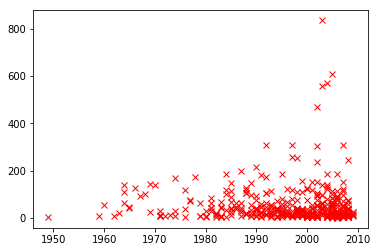

In [10]:
# this ensures the plot appears in the web browser
%matplotlib inline 
import pylab as plt # this imports the plotting library in python

plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')

You may be curious what the arguments we give to plt.plot are for, now is the perfect time to look at the documentation

In [11]:
plt.plot?

We immediately note that some films have a lot of deaths, which prevent us seeing the detail of the main body of films. First lets identify the films with the most deaths.

In [12]:
film_deaths[film_deaths['Body_Count']>200]

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
60,Dip huet gaai tau,1990,214,NaN,Crime|Drama|Thriller,John Woo,Tony Leung Chiu Wai|Jacky Cheung|Waise Lee|Sim...,136,7.7
117,Equilibrium,2002,236,R,Action|Drama|Sci-Fi|Thriller,Kurt Wimmer,Christian Bale|Dominic Purcell|Sean Bean|Chris...,107,7.6
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
291,Rambo,2008,247,R,Action|Thriller|War,Sylvester Stallone,Sylvester Stallone|Julie Benz|Matthew Marsden|...,92,7.1
317,Saving Private Ryan,1998,255,R,Action|Drama|War,Steven Spielberg,Tom Hanks|Tom Sizemore|Edward Burns|Barry Pepp...,169,8.6


Here we are using the command `film_deaths['Body_Count']>200` to index the films in the pandas data frame which have over 200 deaths. To sort them in order we can also use the `sort` command. The result of this command on its own is a data series of `True` and `False` values. However, when it is passed to the `film_deaths` data frame it returns a new data frame which contains only those values for which the data series is `True`. We can also sort the result. To sort the result by the values in the `Body_Count` column in *descending* order we use the following command.

In [13]:
film_deaths[film_deaths['Body_Count']>200].sort_values('Body_Count', ascending=False)

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,Action|Adventure|Fantasy,Peter Jackson,Noel Appleby|Alexandra Astin|Sean Astin|David ...,201,8.9
193,Kingdom of Heaven,2005,610,R,Action|Adventure|Drama|History|War,Ridley Scott,Martin Hancock|Michael Sheen|Nathalie Cox|Eriq...,144,7.2
382,Troy,2004,572,R,Adventure|Drama,Wolfgang Petersen,Julian Glover|Brian Cox|Nathan Jones|Adoni Mar...,163,7.2
206,The Last Samurai,2003,558,R,Action|Drama|History|War,Edward Zwick,Ken Watanabe|Tom Cruise|William Atherton|Chad ...,154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,Action|Adventure|Fantasy,Peter Jackson,Bruce Allpress|Sean Astin|John Bach|Sala Baker...,179,8.8
154,Grindhouse,2007,310,R,Action|Horror|Thriller,Robert Rodriguez|Eli Roth|Quentin Tarantino|Ed...,Kurt Russell|Zoë Bell|Rosario Dawson|Vanessa F...,191,7.7
159,Lat sau san taam,1992,307,R,Action|Crime|Drama|Thriller,John Woo,Yun-Fat Chow|Tony Leung Chiu Wai|Teresa Mo|Phi...,128,8.0
375,Titanic,1997,307,PG-13,Drama|Romance,James Cameron,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,194,7.7
406,We Were Soldiers,2002,305,R,Action|Drama|History|War,Randall Wallace,Mel Gibson|Madeleine Stowe|Greg Kinnear|Sam El...,138,7.1
349,Starship Troopers,1997,256,R,Action|Sci-Fi,Paul Verhoeven,Casper Van Dien|Dina Meyer|Denise Richards|Jak...,129,7.2


We now see that the 'Lord of the Rings' is a large outlier with a very large number of kills. We can try and determine how much of an outlier by histograming the data. 

### Plotting the Data

Text(0.5,1,'Histogram of Film Kill Count')

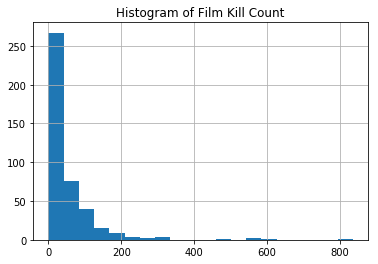

In [14]:
film_deaths['Body_Count'].hist(bins=20) # histogram the data with 20 bins.
plt.title('Histogram of Film Kill Count')

### Assignment Question 2 
Read on the internet about the following python libraries: `numpy`, `matplotlib`, `scipy` and `pandas`. What functionality does each provide in python. What is the `pylab` library and how does it relate to the other libraries?

*10 marks*

#### Question 2 Answer

Numpy is a library of functions to ease the use of multidimentional arrays and other high-level mathematical functions in Python. As the name suggests, it is used to help with numerical computations and applications.<sup>[1](https://www.numpy.org/)</sup>

Matplotlib provides generation of figures and charts in Python and in numpy interfaces.<sup>[2](https://matplotlib.org/)</sup>

Scipy is an extension of numpy to ease perfoming scientific computations in Python. Scipy provides functions to compute integration, FFT, interpolation, image processing, optimisation.<sup>[2](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)</sup>

Pandas is a data transformation and analysis library in Python. It can help the user to filter, sort and reshape data sets. It also can perform manipulations to time-series data with some date and time specific functions.<sup>[3](http://pandas.pydata.org/pandas-docs/stable/)</sup>

Pylab is a set of libraries and tools that allow easy mathematical computation and data analysis. It consists of the libraries NumPy and Matplotlib in the same namespace. It is also used by invoking `%pylab`, as a "magic function", in an IPython session to import the two constituent libraries.<sup>[4](https://stackoverflow.com/a/20961407/1362833)</sup>

References  
[1] NumPy developers, "NumPy", in _Numpy_, 2018. [Online]. Available: https://www.numpy.org/. Accessed: 05 Oct 2018.  
[2] The Matplotlib development team, "Matplotlib: Python plotting," in _Matplotlib documentation_, 21 Sept 2018. [Online] Available: https://matplotlib.org/. Accessed 05 Oct 2018.  
[3] Pandas contributers, "Pandas: powerful Python data analysis toolkit", in _Pandas_, 05 Aug 2018. [Online]. Available: http://pandas.pydata.org/pandas-docs/stable/. Accessed: 05 Oct 2018.  
[4] richizy, "What is %pylab", in _StackOverflow_, 06 Jan 2016. [Online]. Available: https://stackoverflow.com/a/20961407/1362833. Accessed 05 Oct 2018.

We could try and remove these outliers, but another approach would be to plot the logarithm of the counts against the year.

Text(0.5,0,'year')

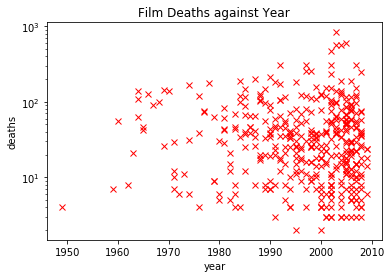

In [15]:
plt.plot(film_deaths['Year'], film_deaths['Body_Count'], 'rx')
ax = plt.gca() # obtain a handle to the current axis
ax.set_yscale('log') # use a logarithmic death scale
# give the plot some titles and labels
plt.title('Film Deaths against Year')
plt.ylabel('deaths')
plt.xlabel('year')

Note a few things. We are interacting with our data. In particular, we are replotting the data according to what we have learned so far. We are using the progamming language as a *scripting* language to give the computer one command or another, and then the next command we enter is dependent on the result of the previous. This is a very different paradigm to classical software engineering. In classical software engineering we normally write many lines of code (entire object classes or functions) before compiling the code and running it. Our approach is more similar to the approach we take whilst debugging. Historically, researchers interacted with data using a *console*. A command line window which allowed command entry. The notebook format we are using is slightly different. Each of the code entry boxes acts like a separate console window. We can move up and down the notebook and run each part in a different order. The *state* of the program is always as we left it after running the previous part.  

### Assignment Question 3

What is jupyter and why was it invented? Give some examples of functionality it gives over standard python. What is the jupyter project? Name two languages involved in the Jupyter project other than python.

*10 marks*

#### Question 3 Answer

Jupyter is an interactive computing environment pioneering in notebook format development paradigm. It was created "to support interactive data science and scientific computing across all programming languages".<sup>[1](http://jupyter.org/about)</sup>

As an interactive computing environment, it allows plotting of the data that is worked on with an easy interface. Jupyter also allows sharing of session state and retention of results even after session is closed. A major advantage in most usecases is the ability to write notes and mathematical comments along with the code.

Project Jupyter is a spin-off of the IPython project, keeping the notebook capabilities seperate from the language dependencies. It also helped marketing the language agnostic vision of the project.<sup>[2](https://speakerdeck.com/fperez/project-jupyter)</sup>

There are several dozens of programming languages supported by the project. Haskell and Julia are two programming languages other than Python, that Jupyter supports.<sup>[3](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)</sup>

References  
[1] Project Jupyter, "Project Jupyter | About Us," in _Jupyter_, 30 Sept 2018. [Online]. Available: http://jupyter.org/about. Accessed On: 05 Oct 2018.  
[2] Fernando Perez, "Project Jupyter," in _Speaker Deck_, 08 Jul 2014. [Online]. Available: https://speakerdeck.com/fperez/project-jupyter. Accessed On: 05 Oct 2018.  
[3] Project Jupyter, "Project Jupyter kernels," in Github, 12 Sept 2018. [Online]. Available: https://github.com/jupyter/jupyter/wiki/Jupyter-kernels. Accessed On: 05 Oct 2018.  

## Probabilities

We are now going to do some simple review of probabilities and use this review to explore some aspects of our data.

A probability distribution expresses uncertainty about the outcome of an event. We often encode this uncertainty in a variable. So if we are considering the outcome of an event, $Y$, to be a coin toss, then we might consider $Y=1$ to be heads and $Y=0$ to be tails. We represent the probability of a given outcome with the notation:
$$
P(Y=1) = 0.5
$$
The first rule of probability is that the probability must normalize. The sum of the probability of all events must equal 1. So if the probability of heads ($Y=1$) is 0.5, then the probability of tails (the only other possible outcome) is given by
$$
P(Y=0) = 1-P(Y=1) = 0.5
$$

Probabilities are often defined as the limit of the ratio between the number of positive outcomes (e.g. *heads*) given the number of trials. If the number of positive outcomes for event $y$ is denoted by $n_y$ and the number of trials is denoted by $N$ then this gives the ratio 
$$
P(Y=y) = \lim_{N\rightarrow \infty}\frac{n_y}{N}.
$$
In practice we never get to observe an event infinite times, so rather than considering this we often use the following estimate
$$
P(Y=y) \approx \frac{n_y}{N}.
$$
Let's use this rule to compute the approximate probability that a film from the movie body count website has over 40 deaths.

In [18]:
deaths = (film_deaths.Body_Count>40).sum()  # number of positive outcomes (in sum True counts as 1, False counts as 0)
total_films = film_deaths.Body_Count.count()
prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 is:", prob_death)

Probability of deaths being greather than 40 is: 0.37767220902612825


### Assignment Question 4

We now have an estimate of the probability a film has greater than 40 deaths. The estimate seems quite high. What could be wrong with the estimate? Do you think any film you go to in the cinema has this probability of having greater than 40 deaths?

Why did we have to use `float` around our counts of deaths and total films? What would the answer have been if we hadn't used the `float` command? If we were using Python 3 would we have this problem?

*20 marks*

#### Question 4 Answer

As we find from the histogram plotted earlier, there are more than 250 movies that don't have a death count greater than 40. Out of the total of 421 movies that we are analysing, the highest deaths found is 836 deaths in only one movie. That is, more than half of the movies don't have number of deaths > 40. Moreover, the highest death count is more than the sample set of movies that we have. Clearly, evaluating an average with a small sample set gives us the above probabilty of finding 40 or more deaths in nearly 38% of the movies. Hence, it is unusual to conclude that the probability of nearly 38% even though in practice it seems to be lesser than that.

We use `float` around counts of deaths and total films to explicitly *type cast* the variables. A variable or constant in Python is said to be type casted when the datatype of the variable/constant is converted from one to another. When we don't type cast (in other words, don't enclose the variables in parantheses) the Python interpreter will do its best to keep the precision of the computation. In the above scenario when we remove the type casts we find the precision of the result has decreased by half than if we would have type casted.

# Conditioning

When predicting whether a coin turns up head or tails, we might think that this event is *independent* of the year or time of day. If we include an observation such as time, then in a probability this is known as *conditioning*. We use this notation, $P(Y=y|T=t)$, to condition the outcome on a second variable (in this case time). Or, often, for a shorthand we use $P(y|t)$ to represent this distribution (the $Y=$ and $T=$ being implicit). Because we don't believe a coin toss depends on time then we might write that 
$$
P(y|t) = p(y).
$$
However, we might believe that the number of deaths is dependent on the year. For this we can try estimating $P(Y>40 | T=2000)$ and compare the result, for example to $P(Y>40|2002)$ using our empirical estimate of the probability.

In [19]:
for year in [2000, 2002]:
    deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
    total_films = (film_deaths.Year==year).sum()

    prob_death = float(deaths)/float(total_films)
    print("Probability of deaths being greather than 40 in year", year, "is:", prob_death)

Probability of deaths being greather than 40 in year 2000 is: 0.16666666666666666
Probability of deaths being greather than 40 in year 2002 is: 0.4074074074074074


### Assignment Question 5

Compute the probability for the number of deaths being over 40 for each year we have in our `film_deaths` data frame. Store the result in a `numpy` array and plot the probabilities against the years using the `plot` command from `matplotlib`. Do you think the estimate we have created of $P(y|t)$ is a good estimate? Write your code and your written answers in the box below.  

*20 marks*

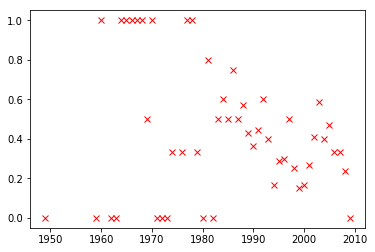

In [21]:
# Question 5 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
years = []
years_deaths = []

for year in film_deaths.Year.unique():
    deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
    total_films = (film_deaths.Year==year).sum()
    prob_death = float(deaths)/float(total_films)
    years.append(year)
    years_deaths.append(prob_death)
plt.plot(years, years_deaths, 'rx')


#### Question 5 Answer Text

From the comparision of the earlier figure and the resultant figure above for the probabilities we can conclude that the estimate is satisfactory for the given data. We may notice that the older years have absolute or near absolute values. This must be because there significatly lesser number of movies from that year than in the years later to 1980. Hence it is possible that the estimates of the recent years are more closer to reality.

#### Notes for Question 5

Make sure the plot is included in *this* notebook file (the `IPython` magic command `%matplotlib inline` we ran above will do that for you, it only needs to be run once per file).

### Rules of Probability

We've now introduced conditioning and independence to the notion of probability and computed some conditional probabilities on a practical example The scatter plot of deaths vs year that we created above can be seen as a *joint* probability distribution. We represent a joint probability using the notation $P(Y=y, T=t)$ or $P(y, t)$ for short. Computing a joint probability is equivalent to answering the simultaneous questions, what's the probability that the number of deaths was over 40 and the year was 2002? Or any other question that may occur to us. Again we can easily use pandas to ask such questions.


In [22]:
year = 2000
deaths = (film_deaths.Body_Count[film_deaths.Year==year]>40).sum()
total_films = film_deaths.Body_Count.count() # this is total number of films
prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 and year being", year, "is:", prob_death)

Probability of deaths being greather than 40 and year being 2000 is: 0.007125890736342043


### The Product Rule

This number is the joint probability, $P(Y, T)$ which is much *smaller* than the conditional probability. The number can never be bigger than the conditional probability because it is computed using the *product rule*.
$$
p(Y=y, T=t) = p(Y=y|T=t)p(T=t)
$$
and $$p(T=t)$$ is a probability distribution, which is equal or less than 1, ensuring the joint distribution is typically smaller than the conditional distribution.

The product rule is a *fundamental* rule of probability, and you must remember it! It gives the relationship between the two questions: 1) What's the probability that a film was made in 2002 and has over 40 deaths? and 2) What's the probability that a film has over 40 deaths given that it was made in 2002?

In our shorter notation we can write the product rule as
$$
p(y, t) = p(y|t)p(t)
$$
We can see the relation working in practice for our data above by computing the different values for $t=2000$.

In [23]:
p_t = float((film_deaths.Year==2002).sum())/float(film_deaths.Body_Count.count())
p_y_given_t = float((film_deaths.Body_Count[film_deaths.Year==2002]>40).sum())/float((film_deaths.Year==2002).sum())
p_y_and_t = float((film_deaths.Body_Count[film_deaths.Year==2002]>40).sum())/float(film_deaths.Body_Count.count())

print("P(t) is", p_t)
print("P(y|t) is", p_y_given_t)
print("P(y,t) is", p_y_and_t)

P(t) is 0.06413301662707839
P(y|t) is 0.4074074074074074
P(y,t) is 0.026128266033254157


### The Sum Rule

The other *fundamental rule* of probability is the *sum rule* this tells us how to get a *marginal* distribution from the joint distribution. Simply put it says that we need to sum across the value we'd like to remove.
$$
P(Y=y) = \sum_{t} P(Y=y, T=t)
$$
Or in our shortened notation
$$
P(y) = \sum_{t} P(y, t)
$$

### Assignment Question 6

Write code that computes $P(y)$ by adding $P(y, t)$ for all values of $t$. 

*10 marks*

In [26]:
# Question 6 Answer Code
# Write code for you answer to this question in this box
# Do not delete these comments, otherwise you will get zero for this answer.
# Make sure your code has run and the answer is correct *before* submitting your notebook for marking.
p_y = 0.
for year in film_deaths.Year.unique():
    p_y += float((film_deaths.Body_Count[film_deaths.Year==year]>40).sum())/float(film_deaths.Body_Count.count())
    
print("P(y) is", p_y)

P(y) is 0.3776722090261285


## Bayes' Rule

Bayes rule is a very simple rule, it's hardly worth the name of a rule at all. It follows directly from the product rule of probability. Because $P(y, t) = P(y|t)P(t)$ and by symmetry $P(y,t)=P(t,y)=P(t|y)P(y)$ then by equating these two equations and dividing through by $P(y)$ we have
$$
P(t|y) = \frac{P(y|t)P(t)}{P(y)},
$$
which is known as Bayes' rule (or Bayes's rule, it depends how you choose to pronounce it). It's not difficult to derive, and its importance is more to do with the semantic operation that it enables. Each of these probability distributions represents the answer to a question we have about the world. Bayes rule (via the product rule) tells us how to *invert* the probability.

## Probabilities for Extracting Information from Data

What use is all this probability in data science? Let's think about how we might use the probabilities to do some decision making. Let's load up a little more information about the movies.

In [27]:
movies = pd.read_csv('./R-vs-Python-master/Deadliest movies scrape/code/film-death-counts-Python.csv')
movies.columns

Index(['Film', 'Year', 'Body_Count', 'MPAA_Rating', 'Genre', 'Director',
       'Actors', 'Length_Minutes', 'IMDB_Rating'],
      dtype='object')

### Assignment Question 7

Now we see we have several additional features including the quality rating (`IMDB_Rating`). Let's assume we want to predict the rating given the other information in the data base. How would we go about doing it? 

Using what you've learnt about joint, conditional and marginal probabilities, as well as the sum and product rule, how would you formulate the question you want to answer in terms of probabilities? Should you be using a joint or a conditional distribution? If it's conditional, what should the distribution be over, and what should it be conditioned on?

*20 marks*

#### Question 7 Answer Text

With the several features that we have to help us predict a movie's rating, we would want to fit the prediction against the available ratings. This happens to be a regression problem, as we would need to fit the available features on a continuous distribution on any newly given movie to predict the rating for. Hence, a linear regression model with a regression function that takes the available features as input parameters and result a predicted rating. However, we find that there are some features that are categorical in nature. For such features, we would have a binary parameter for each category. For example, a movie of genres Action, Thriller, and Drama we will have $x_{action} = 1$, $x_{thriller} = 1$, $x_{drama} = 1$ and all other genre parameters set to $0$ to solve for the solution.

By using the probability concepts that we have learnt, we can solve to predict the rating of a given movie by slightly changing the approach by asking the question "what is the probability that the rating of a _new movie_ can be _x_ given the _properties of the new movie_?" Where _x_ is a rational number on the range of possible ratings. This makes the distribution we will test the ratings to be discrete.

However, the ratings are continuous on $[0, 10]$. We can reach the right _x_ to approach by a divide and conquer approach. We can keep dividing the the range in halves. The first objective will be to find if the rating is higher than or equal to 5, or less than a rating of 5. We find "what is the probability of the rating of a _new movie_ can be between 0 and 5 given the _properties of the new movie_?" Along with "what is the probability of the rating of a _new movie_ can be greater than 5 given the _properties of the new movie_?" Will go ahead keep subdividing the half which has the higher probability to reach to an appropriate rating range, possibly in one decimal range.

The questions of type "what is the probability that the rating of a _new movie_ can be _x_ given the _properties of the new movie_?" are of the form conditional probability. The condition is on all the features of the given movie.

From Baye's Theorem,
$$
P(R_i|x_i) = \frac{P(x_i|R_i)P(R_i)}{P(x_i)}
$$
and applying the Law of Total Probability, i.e.
$$
P(x) = \sum_{i}P(x|x_i)P(x_i)
$$
we get
$$
P(R_i|x_i) = \sum_{k=0}^n\frac{P(x_i|R_i)P(R_i)}{P(x_i|x_k)P(x_k)}
$$
where $n$   = number of movies with feature $i$  
  and $R_i$ = rating of movie x with feature $i$  
  and $x_i$ = feature $i$ in movie $x$  
  and $x_k$ = cummulative feature $k$ in all movies 
  
for all possible features,
$$
P(R|x) = \sum_i\sum_{k=0}^n\frac{P(x_i|R_i)P(R_i)}{P(x_i|x_k)P(x_k)}
$$

## Assignment Questions

The questions in the above lab sheet need to be answered and handed in before 23:59 on 5th October 2018. The hand should be done via file upload through [MOLE](https://www.sheffield.ac.uk/cics/mole). 

## More Fun on the Python Data Farm

If you want to explore more of the things you can do with movies and python you might be interested in the `imdbpy` python library. 

You can try installing it using `easy_install` as follows.

In [1]:
!easy_install -U IMDbPY

Searching for IMDbPY
Reading https://pypi.python.org/simple/IMDbPY/
Best match: IMDbPY 6.6
Processing IMDbPY-6.6.tar.gz
Writing /tmp/easy_install-bu6pn37x/IMDbPY-6.6/setup.cfg
Running IMDbPY-6.6/setup.py -q bdist_egg --dist-dir /tmp/easy_install-bu6pn37x/IMDbPY-6.6/egg-dist-tmp-5bbrxdds
Created locale for: bg pt_BR es ar fr it tr en de.
zip_safe flag not set; analyzing archive contents...
imdb.locale.__pycache__.__init__.cpython-36: module references __file__
creating /home/vamsi-dx/anaconda3/lib/python3.6/site-packages/IMDbPY-6.6-py3.6.egg
Extracting IMDbPY-6.6-py3.6.egg to /home/vamsi-dx/anaconda3/lib/python3.6/site-packages
Adding IMDbPY 6.6 to easy-install.pth file
Installing search_character.py script to /home/vamsi-dx/anaconda3/bin
Installing get_character.py script to /home/vamsi-dx/anaconda3/bin
Installing search_movie.py script to /home/vamsi-dx/anaconda3/bin
Installing search_company.py script to /home/vamsi-dx/anaconda3/bin
Installing get_first_company.py script to /home/vam

If this doesn't work on your machine, try following instructions on (http://imdbpy.sourceforge.net/)

Once you've installed `imdbpy` you can test it works with the following script, which should list movies with the word 'python' in their title. To run the code in the following box, simply click the box and press `SHIFT-enter` or `CTRL-enter`. Then you can try running the code below.

In [2]:
from imdb import IMDb
ia = IMDb()

for movie in ia.search_movie('python'):
    print(movie) 

Python
Policía de narcóticos
Python
Ripping Yarns
Python 2
Police Python 357
Python Night: 30 Years of Monty Python
Ular
Monty Python and the Holy Grail
Monty Python's Flying Circus
Boa vs. Python
Python
Python
Python
Python
Python
The Python
Mega Python vs. Gatoroid
Monty Python Live (Mostly)
Pythons


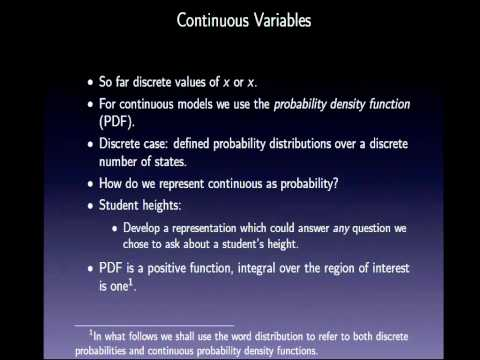

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('GX8VLYUYScM')